In [2]:
import h5py
import numpy as np
import pandas as pd

In [2]:

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 50)


Initial import of raw data sets

In [ ]:
#dataframe = pd.read_hdf('data/collected_test_cases.h5')
#dataframe2 = pd.read_hdf('data/collected_variance.h5')
#dataframe2

Merge the input/output datasets

In [1]:
#merged_df1 = dataframe.reset_index().join(dataframe2,on=['number of models','file name', 'sample_index']).set_index(dataframe.index.names)

Separate the main merged dataframe into subsets based on model number

In [2]:
#models_2 = merged_df1.loc[[i for i in dataframe.index if i[0] == 2]]

#models_3 = merged_df1.loc[[i for i in dataframe.index if i[0] == 3]]

#models_4 = merged_df1.loc[[i for i in dataframe.index if i[0] == 4]]

#models_5 = merged_df1.loc[[i for i in dataframe.index if i[0] == 5]]

#models_6 = merged_df1.loc[[i for i in dataframe.index if i[0] == 6]]

Reset indices to just include the full model scenarios

In [3]:
#models_2 = models_2.reset_index(level=0, drop=True).reset_index(level=0, drop=True).reset_index(drop=True)
#models_3 = models_3.reset_index(level=0, drop=True).reset_index(level=0, drop=True).reset_index(drop=True)
#models_4 = models_4.reset_index(level=0, drop=True).reset_index(level=0, drop=True).reset_index(drop=True)
#models_5 = models_5.reset_index(level=0, drop=True).reset_index(level=0, drop=True).reset_index(drop=True)
#models_6 = models_6.reset_index(level=0, drop=True).reset_index(level=0, drop=True).reset_index(drop=True)

Save to file

In [ ]:
#models_2.to_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/twoModelScenario.csv")

#models_3.to_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/threeModelScenario.csv")

#models_4.to_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/fourModelScenario.csv")

#models_5.to_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/fiveModelScenario.csv")

#models_6.to_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/sixModelScenario.csv")

In [ ]:
#models_2 = pd.read_csv("/Users/bensheridan/Documents/Senior/CMDACapstone/data/twoModelScenario.csv")

In [ ]:
#models_2.head()

In [4]:
#"cov_00", "cov_01", "cov_02", "cov_03","cov_04","cov_05","cov_11","cov_12","cov_13","cov_14","cov_15","cov_22","cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", "cov_55"

# End cleaning, begin grouping

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

models_2 = pd.read_csv("/Users/bensheridan/Downloads/twoModelScenario.csv")
models_3 = pd.read_csv("/Users/bensheridan/Downloads/threeModelScenario.csv")
models_4 = pd.read_csv("/Users/bensheridan/Downloads/fourModelScenario.csv")
models_5 = pd.read_csv("/Users/bensheridan/Downloads/fiveModelScenario.csv")
models_6 = pd.read_csv("/Users/bensheridan/Downloads/sixModelScenario.csv")

Lists of each class of algorithms and sampling strategy for grouping

In [2]:

## By Class
mc_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
          "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
          "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
          "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
          "cov_55", "mlmc", 'mfmc']
acv_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
           "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
           "cov_04","cov_05","cov_11","cov_12","cov_13","cov_14","cov_15","cov_22",
           "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
           "cov_55", 'acvis', 'acvmf','acvkl','wrdiff']

pacv_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
            "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
            "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
            "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", 
            "cov_45", "cov_55", 'grdsr','grdmr','gissr','gismr','acvmfu',
            'gmfsr','gmfmr']


## By sampling strategy
rec_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
          "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
          "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
          "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
          "cov_55", "mlmc", 'wrdiff', 'grdsr','grdmr']
ind_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
           "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
           "cov_04","cov_05","cov_11","cov_12","cov_13","cov_14","cov_15","cov_22",
           "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
           "cov_55", 'acvis', 'gissr','gismr']

unorder_multi_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
            "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
            "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
            "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", 
            "cov_45", "cov_55", 'acvmfu', 'gmfsr','gmfmr']

order_multi_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
            "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
            "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
            "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", 
            "cov_45", "cov_55", 'mfmc','acvmf','acvkl']

########## AMS 


# Algorithm with AMS
ams_mc_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
          "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
          "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
          "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
          "cov_55", "mlmc ams", 'mfmc ams']
ams_acv_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
           "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
           "cov_04","cov_05","cov_11","cov_12","cov_13","cov_14","cov_15","cov_22",
           "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", "cov_45", 
           "cov_55", 'acvis ams', 'acvmf ams','acvkl ams','wrdiff ams']

ams_pacv_alg = ["model_cost_0", "model_cost_1", "model_cost_2", "model_cost_3", 
            "model_cost_4", "model_cost_5", "cov_00", "cov_01", "cov_02", "cov_03",
            "cov_04","cov_05","cov_11","cov_12","cov_13", "cov_14","cov_15","cov_22",
            "cov_23","cov_24","cov_25","cov_33","cov_34", "cov_35", "cov_44", 
            "cov_45", "cov_55", 'grdsr ams','grdmr ams','gissr ams','gismr ams',
            'acvmfu ams','gmfsr ams','gmfmr ams']

In [3]:
sampling_strat_dict = {"mlmc":'recursive', 'wrdiff':'recursive', 'grdsr':'recursive',
                       'grdmr':'recursive', 'acvis':'independent', 'gissr':'independent',
                       'gismr':'independent', 'acvmfu':'unordered multi', 'gmfsr':'unordered multi',
                       'gmfmr':'unordered multi', 'mfmc':'ordered multi','acvmf':'ordered multi',
                       'acvkl':'ordered multi'}

class_dict = {"mlmc":"monte carlo", 'mfmc':"monte carlo", 'acvis':'acv', 'acvmf':'acv',
              'acvkl':'acv','wrdiff':'acv', 'grdsr':'param acv','grdmr':'param acv',
              'gissr':'param acv','gismr':'param acv','acvmfu':'param acv', 'gmfsr':'param acv',
              'gmfmr':'param acv'}

ams_class_dict = {"mlmc ams":"monte carlo", 'mfmc ams':"monte carlo", 'acvis ams':'acv',
                  'acvmf ams':'acv','acvkl ams':'acv','wrdiff ams':'acv', 'grdsr ams':'param acv',
                  'grdmr ams':'param acv', 'gissr ams':'param acv','gismr ams':'param acv','acvmfu ams':'param acv', 
                  'gmfsr ams':'param acv', 'gmfmr ams':'param acv'}

Each model case needs it's own subsection of classes

In [4]:
# Monte Carlo Alg
# ACV Alg
# Parametrically-defined ACV Alg

monte_carlo_alg2 = models_2[mc_alg]
approx_control_var_alg2 = models_2[acv_alg]
parametric_acv_alg2 = models_2[pacv_alg]

monte_carlo_alg3 = models_3[mc_alg]
approx_control_var_alg3 = models_3[acv_alg]
parametric_acv_alg3 = models_3[pacv_alg]

monte_carlo_alg4 = models_4[mc_alg]
approx_control_var_alg4 = models_4[acv_alg]
parametric_acv_alg4 = models_4[pacv_alg]

monte_carlo_alg5 = models_5[mc_alg]
approx_control_var_alg5 = models_5[acv_alg]
parametric_acv_alg5 = models_5[pacv_alg]

monte_carlo_alg6 = models_6[mc_alg]
approx_control_var_alg6 = models_6[acv_alg]
parametric_acv_alg6 = models_6[pacv_alg]


# Monte Carlo Alg AMS
# ACV Alg AMS
# Parametrically-defined ACV Alg AMS

monte_carlo_alg2_ams = models_2[ams_mc_alg]
approx_control_var_alg2_ams = models_2[ams_acv_alg]
parametric_acv_alg2_ams = models_2[ams_pacv_alg]

monte_carlo_alg3_ams = models_3[ams_mc_alg]
approx_control_var_alg3_ams = models_3[ams_acv_alg]
parametric_acv_alg3_ams = models_3[ams_pacv_alg]

monte_carlo_alg4_ams = models_4[ams_mc_alg]
approx_control_var_alg4_ams = models_4[ams_acv_alg]
parametric_acv_alg4_ams = models_4[ams_pacv_alg]

monte_carlo_alg5_ams = models_5[ams_mc_alg]
approx_control_var_alg5_ams = models_5[ams_acv_alg]
parametric_acv_alg5_ams = models_5[ams_pacv_alg]

monte_carlo_alg6 = models_6[ams_mc_alg]
approx_control_var_alg6 = models_6[ams_acv_alg]
parametric_acv_alg6 = models_6[ams_pacv_alg]

# Recursive Difference ALg sort by GRDMR
# Independent Samples Alg sort by GISMR
# Multifidelity Alg sort by ACVKL and GMFMR

recur_diff_alg2 = models_2[rec_alg]
ind_samp_alg2 = models_2[ind_alg]
order_multifidel_alg2 = models_2[order_multi_alg]
unorder_multifidel_alg2 = models_2[unorder_multi_alg]

recur_diff_alg3 = models_3[rec_alg]
ind_samp_alg3 = models_3[ind_alg]
order_multifidel_alg3 = models_3[order_multi_alg]
unorder_multifidel_alg3 = models_3[unorder_multi_alg]

recur_diff_alg4 = models_4[rec_alg]
ind_samp_alg4 = models_4[ind_alg]
order_multifidel_alg4 = models_4[order_multi_alg]
unorder_multifidel_alg4 = models_4[unorder_multi_alg]

recur_diff_alg5 = models_5[rec_alg]
ind_samp_alg5 = models_5[ind_alg]
order_multifidel_alg5 = models_5[order_multi_alg]
unorder_multifidel_alg5 = models_5[unorder_multi_alg]

recur_diff_alg6 = models_6[rec_alg]
ind_samp_alg6 = models_6[ind_alg]
order_multifidel_alg6 = models_6[order_multi_alg]
unorder_multifidel_alg6 = models_6[unorder_multi_alg]

In [10]:
# I want to iterate through each observation = scenario per number of models
# PERCENTAGE OF MODEL SCENARIOS WHERE BEST
## base it on Average model cost?? 
###### average model variance?

list_2model = []
list_3model = []
list_4model = []
list_5model = [] 
list_6model = []

current_df2 = models_2[["mlmc", 'wrdiff', 'grdsr','grdmr', 'acvis', 'gissr','gismr',
                           'acvmfu', 'gmfsr','gmfmr', 'mfmc','acvmf','acvkl']]
current_df3 = models_3[["mlmc", 'wrdiff', 'grdsr','grdmr', 'acvis', 'gissr','gismr',
                           'acvmfu', 'gmfsr','gmfmr', 'mfmc','acvmf','acvkl']]
current_df4 = models_4[["mlmc", 'wrdiff', 'grdsr','grdmr', 'acvis', 'gissr','gismr',
                           'acvmfu', 'gmfsr','gmfmr', 'mfmc','acvmf','acvkl']]
current_df5 = models_5[["mlmc", 'wrdiff', 'grdsr','grdmr', 'acvis', 'gissr','gismr',
                           'acvmfu', 'gmfsr','gmfmr', 'mfmc','acvmf','acvkl']]
current_df6 = models_6[["mlmc", 'wrdiff', 'grdsr','grdmr', 'acvis', 'gissr','gismr',
                           'acvmfu', 'gmfsr','gmfmr', 'mfmc','acvmf','acvkl']]
#for i in range(0, len(models_2)):
    #print(i)
    
    
#    current_row_algs = current_df.iloc[i, :]
#    best_performance = current_row_algs.idxmin()
#    best_class = class_dict.get(best_performance)
#    list_2model.append(best_class)

Iterate through each observation and tally which obs had the best class

In [11]:
#%%timeit
for index, row in current_df2.iterrows():
    #print(row.idxmin())
    best_class = class_dict.get(row.idxmin())
    #print(best_class)
    list_2model.append(best_class)

In [12]:
for index, row in current_df3.iterrows():
    
    best_class = class_dict.get(row.idxmin())
    list_3model.append(best_class)

In [13]:
for index, row in current_df4.iterrows():
    #print(row.idxmin())
    best_class = class_dict.get(row.idxmin())
    #print(best_class)
    list_4model.append(best_class)

In [14]:
for index, row in current_df5.iterrows():
    #print(row.idxmin())
    best_class = class_dict.get(row.idxmin())
    #print(best_class)
    list_5model.append(best_class)

In [15]:
for index, row in current_df6.iterrows():
    #print(row.idxmin())
    best_class = class_dict.get(row.idxmin())
    #print(best_class)
    list_6model.append(best_class)

count frequency of the best classes

In [16]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [17]:
twoModelFreq = CountFrequency(list_2model)

In [19]:
threeModelFreq = CountFrequency(list_3model)

In [20]:
fourModelFreq = CountFrequency(list_4model)

In [21]:
fiveModelFreq = CountFrequency(list_5model)
fiveModelFreq['monte carlo'] = 0

In [22]:
sixModelFreq = CountFrequency(list_6model)
sixModelFreq['monte carlo'] = 0

Calculate percentage

In [23]:
for k in twoModelFreq:
    twoModelFreq[k] = twoModelFreq[k] / len(list_2model)

In [24]:
for k in threeModelFreq:
    threeModelFreq[k] = threeModelFreq[k] / len(list_3model)

In [25]:
for k in fourModelFreq:
    fourModelFreq[k] = fourModelFreq[k] / len(list_4model)

In [26]:
for k in fiveModelFreq:
    fiveModelFreq[k] = fiveModelFreq[k] / len(list_5model)

In [27]:
for k in sixModelFreq:
    sixModelFreq[k] = sixModelFreq[k] / len(list_6model)

In [28]:
desired_order_list = ['acv', 'param acv', 'monte carlo']

twoModelFreq = {k: twoModelFreq[k] for k in desired_order_list}
threeModelFreq = {k: threeModelFreq[k] for k in desired_order_list}
fourModelFreq = {k: fourModelFreq[k] for k in desired_order_list}
fiveModelFreq = {k: fiveModelFreq[k] for k in desired_order_list}
sixModelFreq = {k: sixModelFreq[k] for k in desired_order_list}

In [29]:
twoModelFreq

{'acv': 0.4100872549019608,
 'param acv': 0.42277450980392156,
 'monte carlo': 0.16713823529411764}

In [30]:
model2col = [twoModelFreq[k] for k in twoModelFreq]
model3col = [threeModelFreq[k] for k in threeModelFreq]
model4col = [fourModelFreq[k] for k in fourModelFreq]
model5col = [fiveModelFreq[k] for k in fiveModelFreq]
model6col = [sixModelFreq[k] for k in sixModelFreq]
classes = [k for k in sixModelFreq]

In [3]:
class_freq_df = pd.DataFrame({'Class':classes, '2models':model2col, '3models':model3col, 
              '4models':model4col, '5models':model5col, '6models':model6col})



In [4]:
class_freq_df= class_freq_df.T

In [5]:
class_freq_df['Models'] = ['Models',2,3,4,5,6]

In [6]:
new_header = class_freq_df.iloc[0]
class_freq_df = class_freq_df[1:]
class_freq_df.columns = new_header
class_freq_df.columns = ['acv', 'param_acv', 'monte_carlo', 'Models']

ValueError: Length mismatch: Expected axis has 1 elements, new values have 4 elements

In [9]:
class_freq_df

In [10]:
plt.figure(figsize=(9,8))
plt.plot(class_freq_df.Models, class_freq_df.acv)
plt.plot(class_freq_df.Models, class_freq_df.param_acv, color='green', linestyle="dashdot")
plt.plot(class_freq_df.Models, class_freq_df.monte_carlo, color='red', linestyle="dashed")
plt.xticks([2,3,4,5,6], fontsize=20)
plt.yticks(fontsize=20)
plt.title("% of Scenarios that Algorithm Classes Perform the Best", fontsize = 25)
plt.xlabel('Number of Models', fontsize=22); plt.ylabel('% of Model Scenarios Where Best', fontsize=22)
plt.legend(['ACV', 'Parametrically-defined ACV', 'Analytical'], fontsize=20)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'acv'

<Figure size 648x576 with 0 Axes>

Do same but within the P-ACV algorithms

In [308]:
#pacv_list_2model = []
#pacv_list_3model = []
#pacv_list_4model = []
#pacv_list_5model = []
#pacv_list_6model = []

In [309]:
for index, row in current_df2.iterrows():
    best_class = class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        pacv_list_2model.append(row.idxmin())

In [285]:
for index, row in current_df3.iterrows():
    best_class = class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        pacv_list_3model.append(row.idxmin())

In [286]:
for index, row in current_df4.iterrows():
    best_class = class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        pacv_list_4model.append(row.idxmin())

In [287]:
for index, row in current_df5.iterrows():
    best_class = class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        pacv_list_5model.append(row.idxmin())

In [288]:
for index, row in current_df6.iterrows():
    best_class = class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        pacv_list_6model.append(row.idxmin())

In [311]:
len(pacv_list_2model)

431230

In [323]:
pacv_2freq = CountFrequency(pacv_list_2model)
pacv_2freq['grdsr'] = 0
pacv_2freq['gissr'] = 0
pacv_2freq['gmfsr'] = 0
pacv_2freq['gmfmr'] = 0
pacv_2freq['grdmr'] = 0
pacv_2freq['gismr'] = 0

for k in pacv_2freq:
    pacv_2freq[k] = pacv_2freq[k] / len(pacv_list_2model)

In [324]:
pacv_3freq = CountFrequency(pacv_list_3model)
pacv_3freq['gmfmr'] = 0
pacv_3freq['grdmr'] = 0
pacv_3freq['gismr'] = 0

for k in pacv_3freq:
    pacv_3freq[k] = pacv_3freq[k] / len(pacv_list_3model)

In [325]:
pacv_4freq = CountFrequency(pacv_list_4model)

for k in pacv_4freq:
    pacv_4freq[k] = pacv_4freq[k] / len(pacv_list_4model)

In [326]:
pacv_5freq = CountFrequency(pacv_list_5model)

for k in pacv_5freq:
    pacv_5freq[k] = pacv_5freq[k] / len(pacv_list_5model)

In [327]:
pacv_6freq = CountFrequency(pacv_list_6model)

for k in pacv_6freq:
    pacv_6freq[k] = pacv_6freq[k] / len(pacv_list_6model)

In [334]:
desired_order_list = ['grdsr', 'grdmr', 'gissr','gismr','acvmfu', 'gmfsr', 'gmfmr']

pacv_2freq = {k: pacv_2freq[k] for k in desired_order_list}
pacv_3freq = {k: pacv_3freq[k] for k in desired_order_list}
pacv_4freq = {k: pacv_4freq[k] for k in desired_order_list}
pacv_5freq = {k: pacv_5freq[k] for k in desired_order_list}
pacv_6freq = {k: pacv_6freq[k] for k in desired_order_list}

pacv_2col = [pacv_2freq[k] for k in pacv_2freq]
pacv_3col = [pacv_3freq[k] for k in pacv_3freq]
pacv_4col = [pacv_4freq[k] for k in pacv_4freq]
pacv_5col = [pacv_5freq[k] for k in pacv_5freq]
pacv_6col = [pacv_6freq[k] for k in pacv_6freq]
algorithms = desired_order_list

In [341]:
pacv_freq_df = pd.DataFrame({'algorithms':algorithms, '2models':pacv_2col, '3models':pacv_3col, 
              '4models':pacv_4col, '5models':pacv_5col, '6models':pacv_6col})

pacv_freq_df= pacv_freq_df.T
pacv_freq_df['Models'] = ['Models',2,3,4,5,6]

In [342]:
new_header = pacv_freq_df.iloc[0]
pacv_freq_df = pacv_freq_df[1:]
pacv_freq_df.columns = new_header
pacv_freq_df.columns = ['grdsr', 'grdmr', 'gissr','gismr','acvmfu', 'gmfsr', 'gmfmr', 'Models']

In [343]:
pacv_freq_df

,grdsr,grdmr,gissr,gismr,acvmfu,gmfsr,gmfmr,Models
2models,0,0,0,0,1,0,0,2
3models,0.389845,0,0.0103106,0,0.576544,0.0233002,0,3
4models,0.312354,0.0294536,0.115446,0.0135865,0.350261,0.115349,0.0635496,4
5models,0.195226,0.0610035,0.121565,0.0422478,0.127525,0.137732,0.314701,5
6models,0.0975949,0.078455,0.0740225,0.068545,0.0293647,0.0636844,0.588333,6


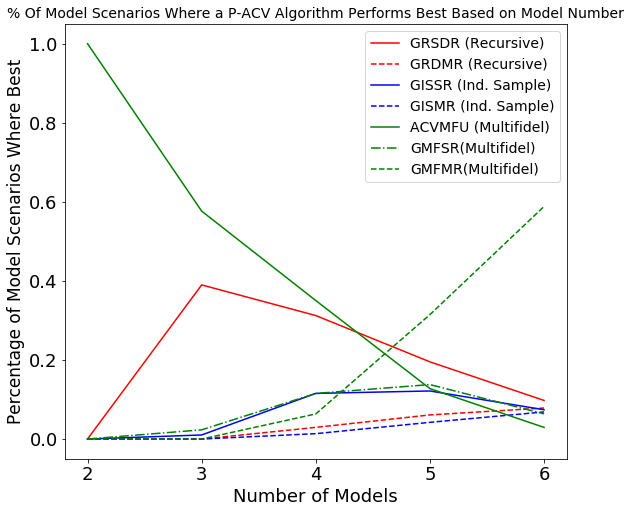

In [371]:
plt.figure(figsize=(9,8))
plt.plot(pacv_freq_df.Models, pacv_freq_df.grdsr, color='red')
plt.plot(pacv_freq_df.Models, pacv_freq_df.grdmr, color='red', linestyle="dashed")
plt.plot(pacv_freq_df.Models, pacv_freq_df.gissr, color='blue', linestyle="solid")
plt.plot(pacv_freq_df.Models, pacv_freq_df.gismr, color='blue', linestyle="dashed")
plt.plot(pacv_freq_df.Models, pacv_freq_df.acvmfu, color='green', linestyle="solid")
plt.plot(pacv_freq_df.Models, pacv_freq_df.gmfsr, color='green', linestyle="dashdot")
plt.plot(pacv_freq_df.Models, pacv_freq_df.gmfmr, color='green', linestyle="dashed")
plt.xticks([2,3,4,5,6], fontsize=18)
plt.yticks(fontsize=18)
plt.title("% Of Model Scenarios Where a P-ACV Algorithm Performs Best Based on Model Number", fontsize = 14)
plt.xlabel('Number of Models',fontsize=18); plt.ylabel('Percentage of Model Scenarios Where Best', fontsize=17)
plt.legend(['GRSDR (Recursive)', 'GRDMR (Recursive)', 'GISSR (Ind. Sample)','GISMR (Ind. Sample)','ACVMFU (Multifidel)', 'GMFSR(Multifidel)', 'GMFMR(Multifidel)'], fontsize=14)
plt.show()

### *the majority of 2-model and 3-model case variances were similar, and the code selected the first appearance of the minimum variance, which happened to be ACVMFU  

# By Class, but with AMS on

In [377]:
current_df2 = models_2[["mlmc ams", 'wrdiff ams', 'grdsr ams','grdmr ams', 'acvis ams',
                        'gissr ams','gismr ams', 'acvmfu ams', 'gmfsr ams','gmfmr ams',
                        'mfmc ams','acvmf ams','acvkl ams']]
current_df3 = models_3[["mlmc ams", 'wrdiff ams', 'grdsr ams','grdmr ams', 'acvis ams',
                        'gissr ams','gismr ams', 'acvmfu ams', 'gmfsr ams','gmfmr ams',
                        'mfmc ams','acvmf ams','acvkl ams']]
current_df4 = models_4[["mlmc ams", 'wrdiff ams', 'grdsr ams','grdmr ams', 'acvis ams',
                        'gissr ams','gismr ams', 'acvmfu ams', 'gmfsr ams','gmfmr ams',
                        'mfmc ams','acvmf ams','acvkl ams']]
current_df5 = models_5[["mlmc ams", 'wrdiff ams', 'grdsr ams','grdmr ams', 'acvis ams',
                        'gissr ams','gismr ams', 'acvmfu ams', 'gmfsr ams','gmfmr ams',
                        'mfmc ams','acvmf ams','acvkl ams']]
current_df6 = models_6[["mlmc ams", 'wrdiff ams', 'grdsr ams','grdmr ams', 'acvis ams',
                        'gissr ams','gismr ams', 'acvmfu ams', 'gmfsr ams','gmfmr ams',
                        'mfmc ams','acvmf ams','acvkl ams']]

In [378]:
ams_list_2model = []
ams_list_3model = []
ams_list_4model = []
ams_list_5model = [] 
ams_list_6model = []

In [379]:
for index, row in current_df2.iterrows():

    best_class = ams_class_dict.get(row.idxmin())

    ams_list_2model.append(best_class)

In [380]:
for index, row in current_df3.iterrows():
    
    best_class = ams_class_dict.get(row.idxmin())
    ams_list_3model.append(best_class)

In [381]:
for index, row in current_df4.iterrows():
    
    best_class = ams_class_dict.get(row.idxmin())
    ams_list_4model.append(best_class)

In [382]:
for index, row in current_df5.iterrows():
    
    best_class = ams_class_dict.get(row.idxmin())
    ams_list_5model.append(best_class)

In [383]:
for index, row in current_df6.iterrows():
    
    best_class = ams_class_dict.get(row.idxmin())
    ams_list_6model.append(best_class)

In [389]:
ams_2freq = CountFrequency(ams_list_2model)

for k in ams_2freq:
    ams_2freq[k] = ams_2freq[k] / len(ams_list_2model)

In [390]:
ams_3freq = CountFrequency(ams_list_3model)

for k in ams_3freq:
    ams_3freq[k] = ams_3freq[k] / len(ams_list_3model)

In [391]:
ams_4freq = CountFrequency(ams_list_4model)

for k in ams_4freq:
    ams_4freq[k] = ams_4freq[k] / len(ams_list_4model)

In [392]:
ams_5freq = CountFrequency(ams_list_5model)

for k in ams_5freq:
    ams_5freq[k] = ams_5freq[k] / len(ams_list_5model)

In [393]:
ams_6freq = CountFrequency(ams_list_6model)

for k in ams_6freq:
    ams_6freq[k] = ams_6freq[k] / len(ams_list_6model)

In [399]:
desired_order_list = ['acv', 'param acv', 'monte carlo']

ams_2freq = {k: ams_2freq[k] for k in desired_order_list}
ams_3freq = {k: ams_3freq[k] for k in desired_order_list}
ams_4freq = {k: ams_4freq[k] for k in desired_order_list}
ams_5freq = {k: ams_5freq[k] for k in desired_order_list}
ams_6freq = {k: ams_6freq[k] for k in desired_order_list}

ams_2col = [ams_2freq[k] for k in ams_2freq]
ams_3col = [ams_3freq[k] for k in ams_3freq]
ams_4col = [ams_4freq[k] for k in ams_4freq]
ams_5col = [ams_5freq[k] for k in ams_5freq]
ams_6col = [ams_6freq[k] for k in ams_6freq]
classes = desired_order_list

In [401]:
ams_freq_df = pd.DataFrame({'Class':classes, '2models':ams_2col, '3models':ams_3col, 
              '4models':ams_4col, '5models':ams_5col, '6models':ams_6col})

ams_freq_df= ams_freq_df.T
ams_freq_df['Models'] = ['Models',2,3,4,5,6]


,0,1,2,Models
Class,acv,param acv,monte carlo,Models
2models,0.234315,0.333395,0.43229,2
3models,0.182285,0.661771,0.155944,3
4models,0.135629,0.806148,0.058223,4
5models,0.0908124,0.886208,0.02298,5
6models,0.0588349,0.931281,0.00988387,6


In [402]:
new_header = ams_freq_df.iloc[0]
ams_freq_df = ams_freq_df[1:]
ams_freq_df.columns = new_header
ams_freq_df.columns = ['acv', 'param_acv', 'monte_carlo', 'Models']

In [403]:
ams_freq_df

,acv,param_acv,monte_carlo,Models
2models,0.234315,0.333395,0.43229,2
3models,0.182285,0.661771,0.155944,3
4models,0.135629,0.806148,0.058223,4
5models,0.0908124,0.886208,0.02298,5
6models,0.0588349,0.931281,0.00988387,6


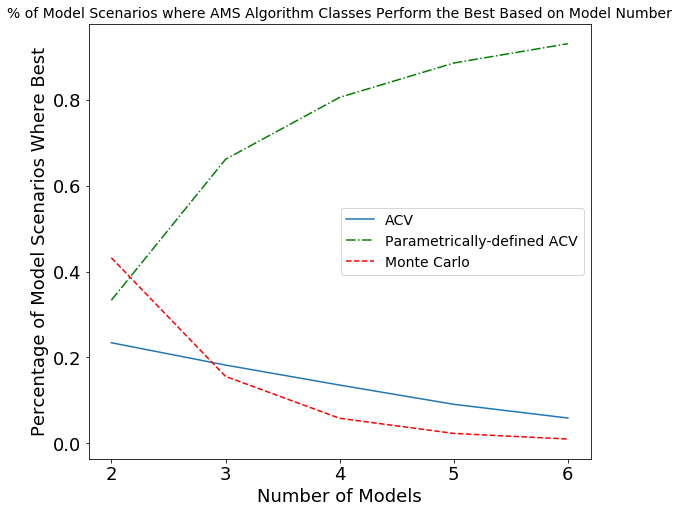

In [404]:
plt.figure(figsize=(9,8))
plt.plot(ams_freq_df.Models, ams_freq_df.acv)
plt.plot(ams_freq_df.Models, ams_freq_df.param_acv, color='green', linestyle="dashdot")
plt.plot(ams_freq_df.Models, ams_freq_df.monte_carlo, color='red', linestyle="dashed")
plt.xticks([2,3,4,5,6], fontsize=18)
plt.yticks(fontsize=18)
plt.title("% of Model Scenarios where AMS Algorithm Classes Perform the Best Based on Model Number", fontsize = 14)
plt.xlabel('Number of Models', fontsize=18); plt.ylabel('Percentage of Model Scenarios Where Best', fontsize=18)
plt.legend(['ACV', 'Parametrically-defined ACV', 'Monte Carlo'], fontsize=14)
plt.show()

# Parametrically-defined ACV with AMS Distribution

In [406]:
ams_pacv_list_2model = []
ams_pacv_list_3model = []
ams_pacv_list_4model = []
ams_pacv_list_5model = []
ams_pacv_list_6model = []

In [408]:
for index, row in current_df2.iterrows():
    best_class = ams_class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        ams_pacv_list_2model.append(row.idxmin())

In [409]:
for index, row in current_df3.iterrows():
    best_class = ams_class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        ams_pacv_list_3model.append(row.idxmin())

In [410]:
for index, row in current_df4.iterrows():
    best_class = ams_class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        ams_pacv_list_4model.append(row.idxmin())

In [411]:
for index, row in current_df5.iterrows():
    best_class = ams_class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        ams_pacv_list_5model.append(row.idxmin())

In [412]:
for index, row in current_df6.iterrows():
    best_class = ams_class_dict.get(row.idxmin())
    
    if best_class == 'param acv':
        ams_pacv_list_6model.append(row.idxmin())

In [422]:
ams_pacv_2freq = CountFrequency(ams_pacv_list_2model)
ams_pacv_2freq['grdsr ams'] = 0
ams_pacv_2freq['gissr ams'] = 0
ams_pacv_2freq['gmfsr ams'] = 0
ams_pacv_2freq['gmfmr ams'] = 0
ams_pacv_2freq['grdmr ams'] = 0
ams_pacv_2freq['gismr ams'] = 0

for k in ams_pacv_2freq:
    ams_pacv_2freq[k] = ams_pacv_2freq[k] / len(ams_pacv_list_2model)

In [423]:
ams_pacv_3freq = CountFrequency(ams_pacv_list_3model)
ams_pacv_3freq['gmfmr ams'] = 0
ams_pacv_3freq['grdmr ams'] = 0
ams_pacv_3freq['gismr ams'] = 0

for k in ams_pacv_3freq:
    ams_pacv_3freq[k] = ams_pacv_3freq[k] / len(ams_pacv_list_3model)

In [424]:
ams_pacv_4freq = CountFrequency(ams_pacv_list_4model)

for k in ams_pacv_4freq:
    ams_pacv_4freq[k] = ams_pacv_4freq[k] / len(ams_pacv_list_4model)

In [425]:
ams_pacv_5freq = CountFrequency(ams_pacv_list_5model)

for k in ams_pacv_5freq:
    ams_pacv_5freq[k] = ams_pacv_5freq[k] / len(ams_pacv_list_5model)

In [426]:
ams_pacv_6freq = CountFrequency(ams_pacv_list_6model)

for k in ams_pacv_6freq:
    ams_pacv_6freq[k] = ams_pacv_6freq[k] / len(ams_pacv_list_6model)

In [427]:
ams_pacv_3freq

{'grdsr ams': 0.23476398935583456,
 'acvmfu ams': 0.7443571870027548,
 'gissr ams': 0.004475868540628102,
 'gmfsr ams': 0.016402955100782598,
 'gmfmr ams': 0.0,
 'grdmr ams': 0.0,
 'gismr ams': 0.0}

In [428]:
desired_order_list = ['grdsr ams', 'grdmr ams', 'gissr ams','gismr ams','acvmfu ams', 
                      'gmfsr ams', 'gmfmr ams']

ams_pacv_2freq = {k: ams_pacv_2freq[k] for k in desired_order_list}
ams_pacv_3freq = {k: ams_pacv_3freq[k] for k in desired_order_list}
ams_pacv_4freq = {k: ams_pacv_4freq[k] for k in desired_order_list}
ams_pacv_5freq = {k: ams_pacv_5freq[k] for k in desired_order_list}
ams_pacv_6freq = {k: ams_pacv_6freq[k] for k in desired_order_list}

ams_pacv_2col = [ams_pacv_2freq[k] for k in ams_pacv_2freq]
ams_pacv_3col = [ams_pacv_3freq[k] for k in ams_pacv_3freq]
ams_pacv_4col = [ams_pacv_4freq[k] for k in ams_pacv_4freq]
ams_pacv_5col = [ams_pacv_5freq[k] for k in ams_pacv_5freq]
ams_pacv_6col = [ams_pacv_6freq[k] for k in ams_pacv_6freq]
ams_algorithms = desired_order_list

In [429]:
ams_pacv_freq_df = pd.DataFrame({'algorithms':ams_algorithms, '2models':ams_pacv_2col, 
                             '3models':ams_pacv_3col, '4models':ams_pacv_4col, 
                             '5models':ams_pacv_5col, '6models':ams_pacv_6col})

ams_pacv_freq_df= ams_pacv_freq_df.T
ams_pacv_freq_df['Models'] = ['Models',2,3,4,5,6]

In [430]:
new_header = ams_pacv_freq_df.iloc[0]
ams_pacv_freq_df = ams_pacv_freq_df[1:]
ams_pacv_freq_df.columns = new_header
ams_pacv_freq_df.columns = ['grdsr_ams', 'grdmr_ams', 'gissr_ams','gismr_ams','acvmfu_ams',
                            'gmfsr_ams', 'gmfmr_ams', 'Models']

ams_pacv_freq_df

,grdsr_ams,grdmr_ams,gissr_ams,gismr_ams,acvmfu_ams,gmfsr_ams,gmfmr_ams,Models
2models,0,0,0,0,1,0,0,2
3models,0.234764,0,0.00447587,0,0.744357,0.016403,0,3
4models,0.222733,0.000112882,0.00756313,5.33401e-05,0.636588,0.110067,0.0228829,4
5models,0.177572,0.000554067,0.00813982,0.000279286,0.45979,0.195036,0.15863,5
6models,0.134458,0.0011934,0.00787776,0.000677152,0.303565,0.202911,0.349317,6


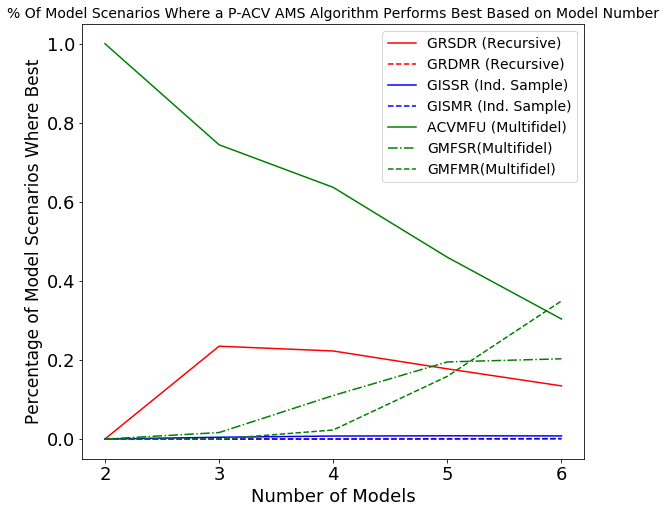

In [431]:
plt.figure(figsize=(9,8))
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.grdsr_ams, color='red')
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.grdmr_ams, color='red', linestyle="dashed")
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.gissr_ams, color='blue', linestyle="solid")
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.gismr_ams, color='blue', linestyle="dashed")
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.acvmfu_ams, color='green', linestyle="solid")
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.gmfsr_ams, color='green', linestyle="dashdot")
plt.plot(ams_pacv_freq_df.Models, ams_pacv_freq_df.gmfmr_ams, color='green', linestyle="dashed")
plt.xticks([2,3,4,5,6], fontsize=18)
plt.yticks(fontsize=18)
plt.title("% Of Model Scenarios Where a P-ACV AMS Algorithm Performs Best Based on Model Number", fontsize = 14)
plt.xlabel('Number of Models',fontsize=18); plt.ylabel('Percentage of Model Scenarios Where Best', fontsize=17)
plt.legend(['GRSDR (Recursive)', 'GRDMR (Recursive)', 'GISSR (Ind. Sample)','GISMR (Ind. Sample)','ACVMFU (Multifidel)', 'GMFSR(Multifidel)', 'GMFMR(Multifidel)'], fontsize=14)
plt.show()

In [468]:
for i in range(0, len(models_6)):
    if models_6.grdmr[i] == models_6.acvmfu[i]:
        print("Same")

In [461]:
current_df6.idxmin(axis=1).value_counts(normalize=True)

gmfmr ams     0.325312
acvmfu ams    0.282705
gmfsr ams     0.188967
grdsr ams     0.125219
acvis ams     0.027329
acvmf ams     0.024407
gissr ams     0.007336
mlmc ams      0.006899
wrdiff ams    0.005176
mfmc ams      0.002985
acvkl ams     0.001923
grdmr ams     0.001111
gismr ams     0.000631
dtype: float64